# World Happiness dataset

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Prepare dataset
df = pd.read_csv(r'/kaggle/input/world-happiness-based-on-cpi-20152020/WorldHappiness_Corruption_2015_2020.csv')
df

Country  happiness_score  gdp_per_capita    family    health  \
0         Norway           7.5370        1.616463  1.533524  0.796667   
1        Denmark           7.5220        1.482383  1.551122  0.792566   
2        Iceland           7.5040        1.480633  1.610574  0.833552   
3    Switzerland           7.4940        1.564980  1.516912  0.858131   
4        Finland           7.4690        1.443572  1.540247  0.809158   
..           ...              ...             ...       ...       ...   
787     Botswana           3.4789        0.997549  0.000000  0.494102   
788     Tanzania           3.4762        0.457163  0.000000  0.442678   
789       Rwanda           3.3123        0.343243  0.000000  0.572383   
790     Zimbabwe           3.2992        0.425564  0.000000  0.375038   
791  Afghanistan           2.5669        0.300706  0.000000  0.266052   

      freedom  generosity  government_trust  dystopia_residual continent  \
0    0.635423    0.362012          0.315964           2.277027    Europe   
1    0.626007    0.355280          0.400770           2.313707    Europe   
2    0.627163    0.475540          0.153527           2.322715    Europe   
3    0.620071    0.290549          0.367007           2.276716    Europe   
4    0.617951    0.245483          0.382612           2.430182    Europe   
..        ...         ...               ...                ...       ...   
787  0.509089    0.033407          0.101786           0.257241    Africa   
788  0.509343    0.271541          0.203881           0.718963    Africa   
789  0.604088    0.235705          0.485542           0.548445    Africa   
790  0.377405    0.151349          0.080929           0.841031    Africa   
791  0.000000    0.135235          0.001226           1.507236      Asia   

     Year  social_support  cpi_score  
0    2015        0.000000         88  
1    2015        0.000000         91  
2    2015        0.000000         79  
3    2015        0.000000         86  
4    2015        0.000000         90  
..    ...             ...        ...  
787  2020        1.085695         60  
788  2020        0.872675         38  
789  2020        0.522876         54  
790  2020        1.047835         24  
791  2020        0.356434         19  

[792 rows x 13 columns]

In [3]:
# Exploratory dataset
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB
None
Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 

In [4]:
df.set_index('Year', inplace=True)

<AxesSubplot:xlabel='Year', ylabel='happiness_score'>

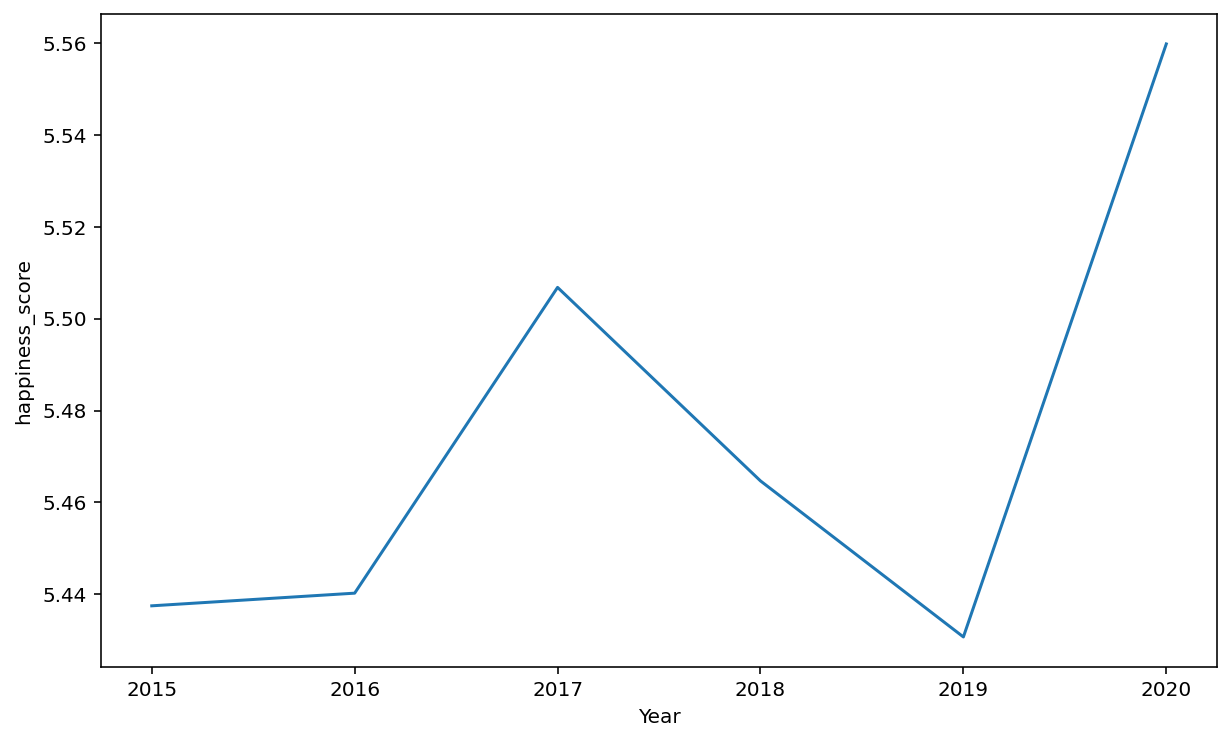

In [5]:
# Prepare data for visualization
plt.figure(figsize=(10,6))
sns.lineplot(data=df.reset_index(),x='Year', y='happiness_score',ci=None)

<AxesSubplot:xlabel='happiness_score', ylabel='continent'>

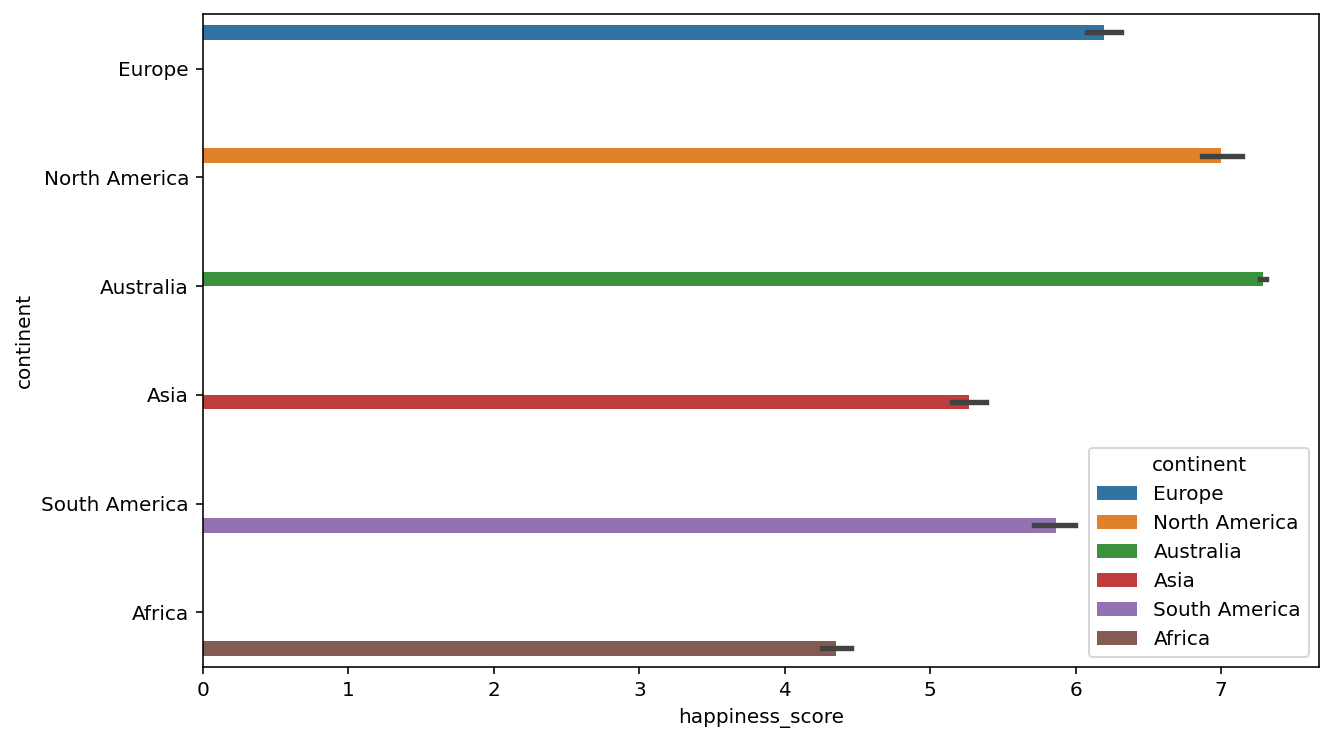

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,y='continent', x='happiness_score', hue='continent')

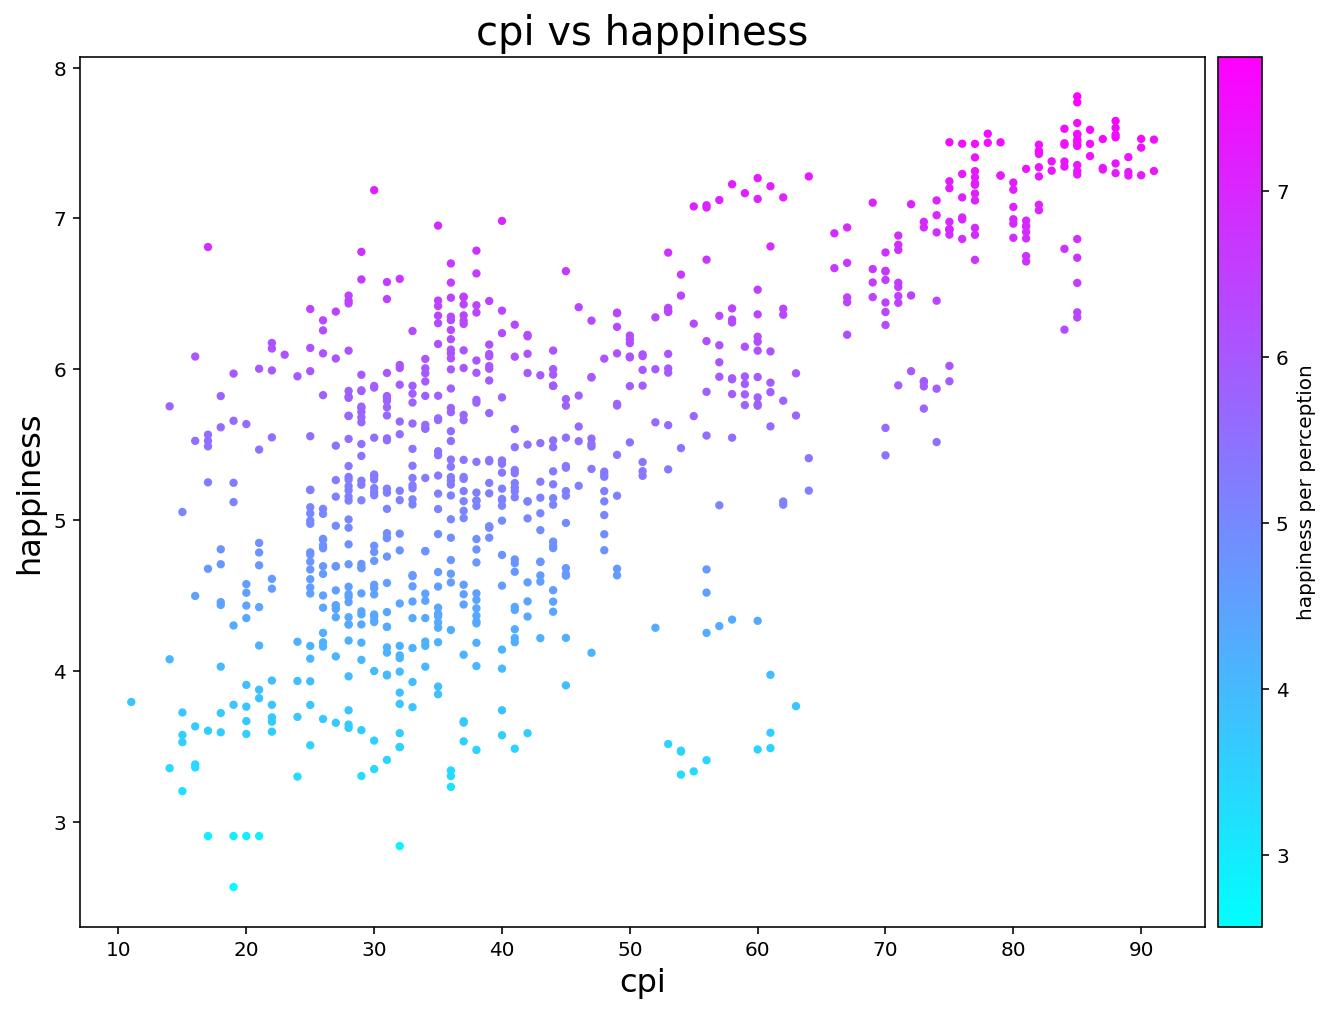

In [7]:
happiness = df.happiness_score
cpi = df.cpi_score

plt.figure(figsize=(12,8))
scatter_hpc = plt.scatter(cpi,happiness,s=10, c=happiness , cmap='cool')
plt.xlabel('cpi', fontsize='16')
plt.ylabel('happiness', fontsize='16')
plt.title('cpi vs happiness', fontsize='20')
plt.colorbar(scatter_hpc, label='happiness per perception',
              orientation='vertical', location='right', pad=.01);

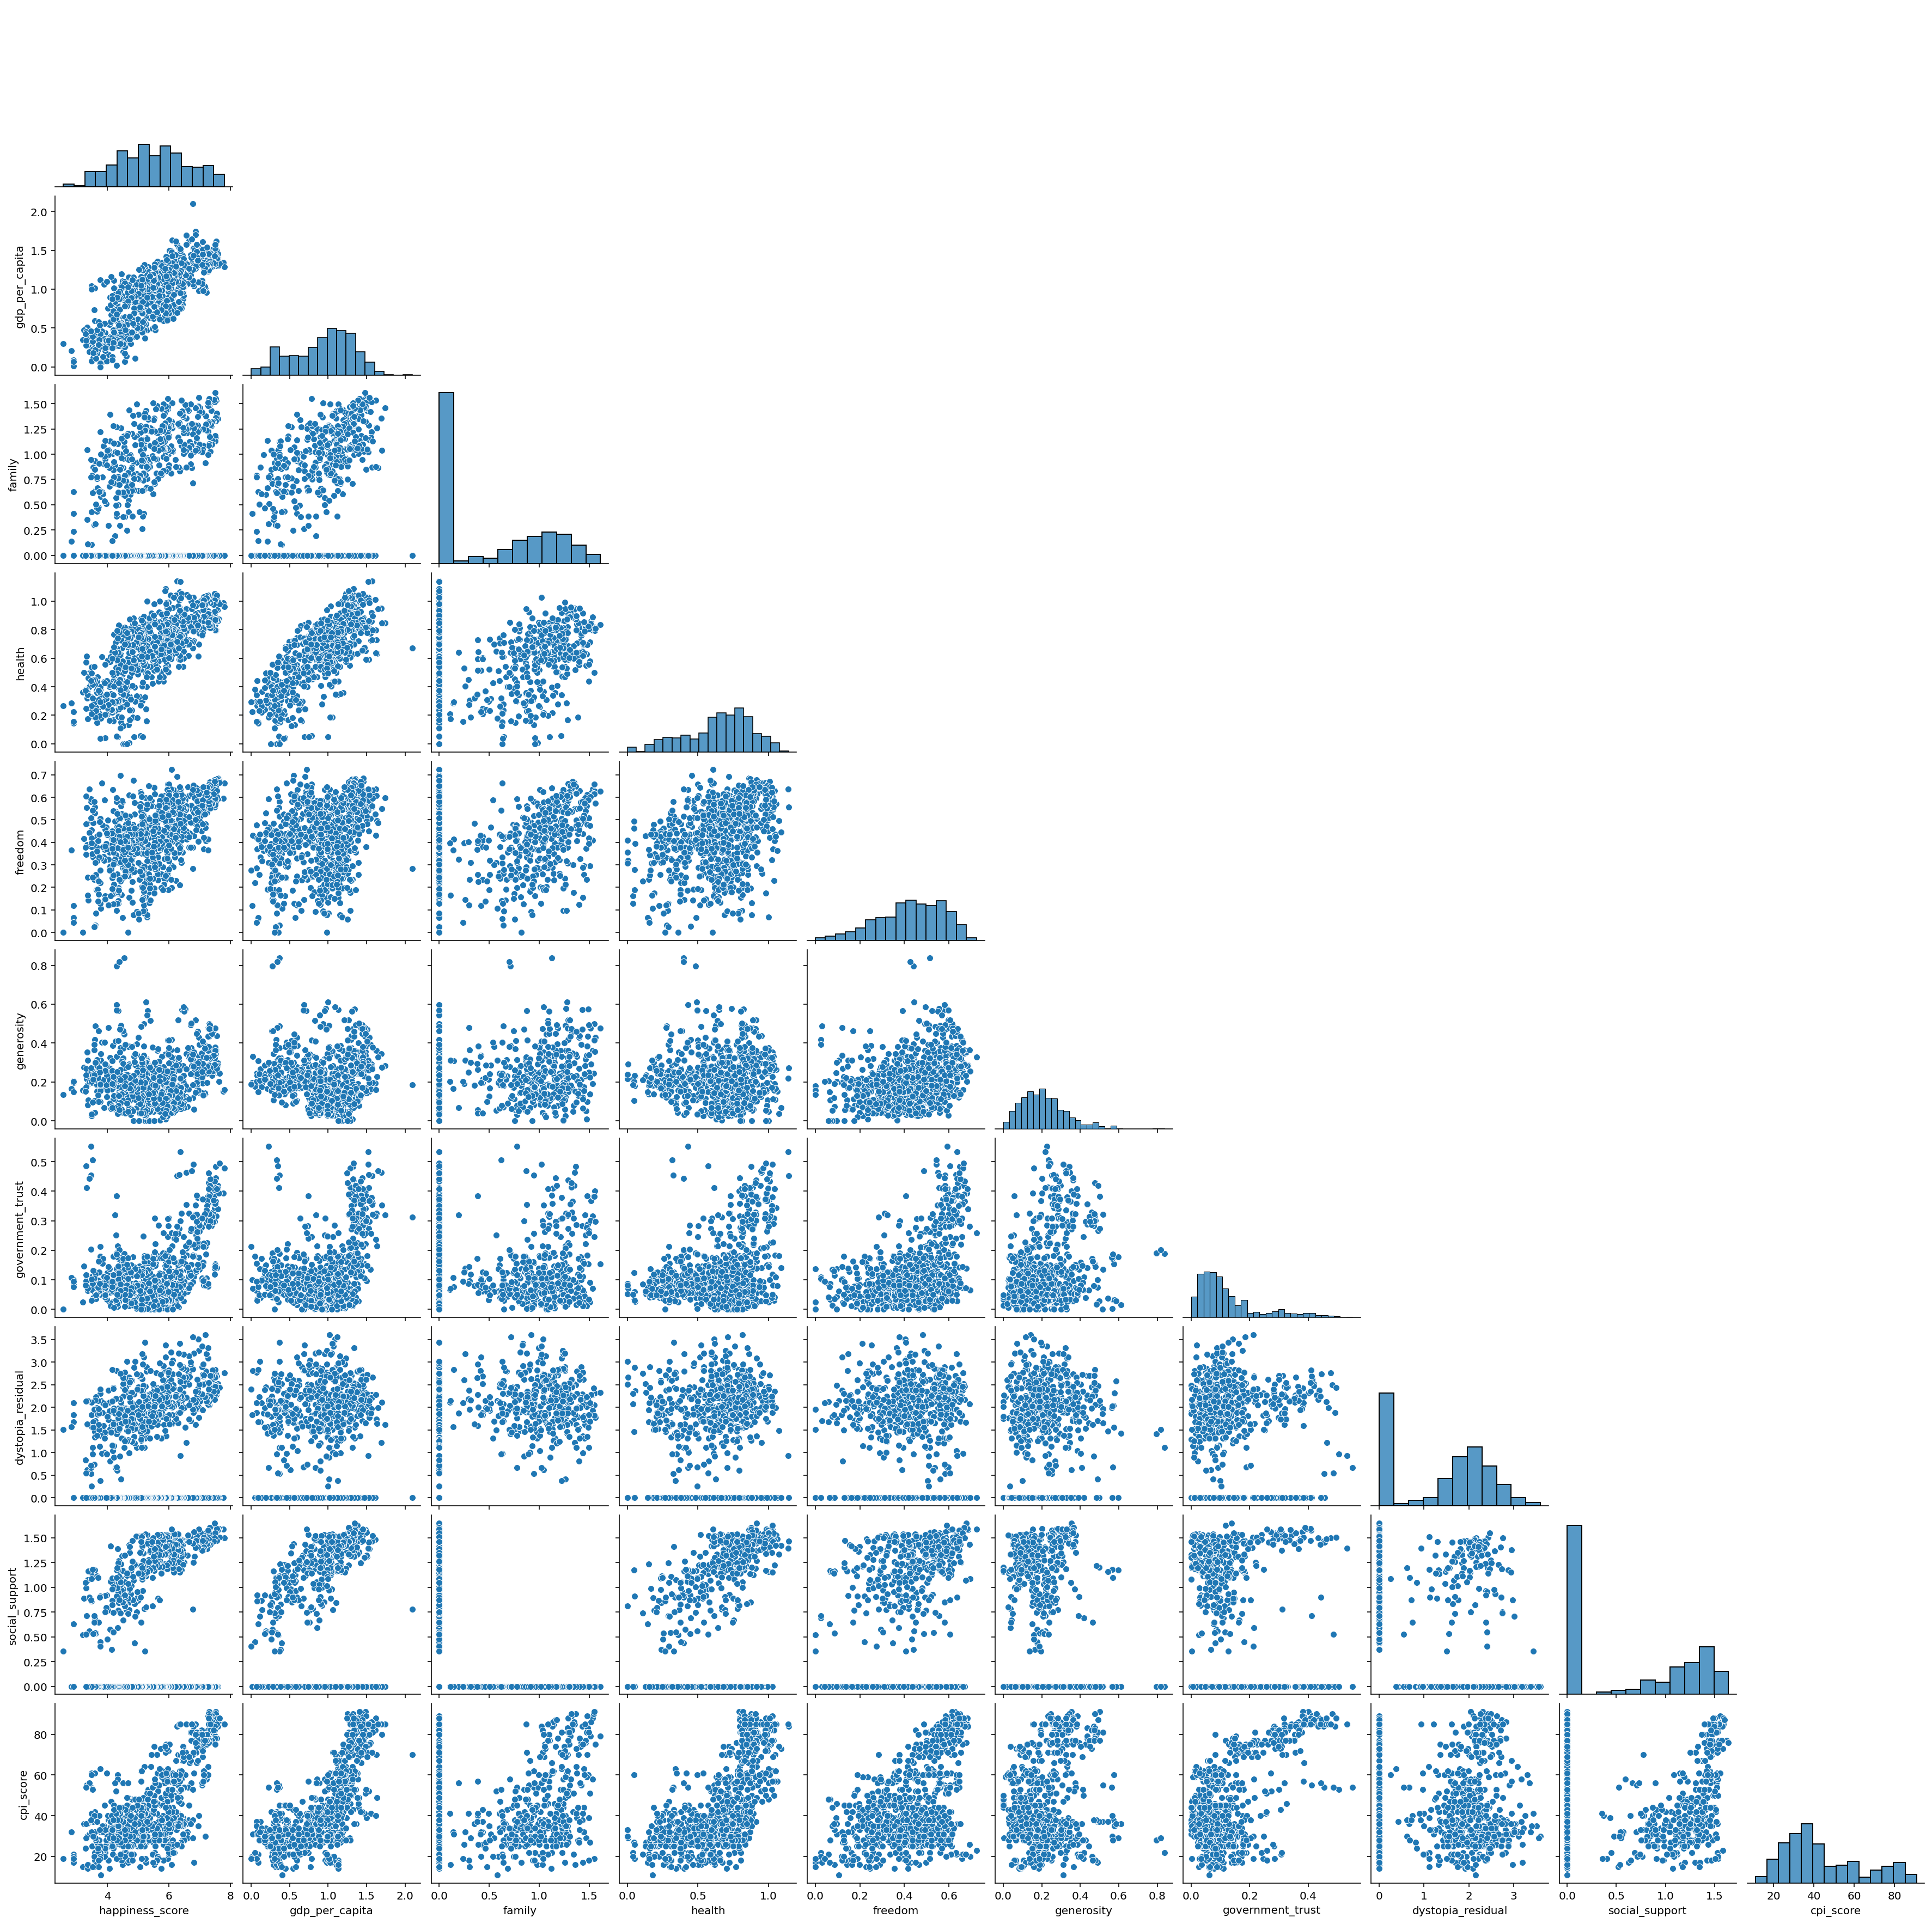

In [8]:
select_vars = ['happiness_score', 'gdp_per_capita', 'family', 'health',
               'freedom', 'generosity', 'government_trust', 'dystopia_residual',
               'social_support', 'cpi_score']
sns.pairplot(data=df.reset_index(), vars=select_vars, corner=True);

From seaborn pairplot the correlated information includes: 
    **'happiness_score','gdp_per_capita', 'health','freedom', 'government_trust', 'cpi_score'**

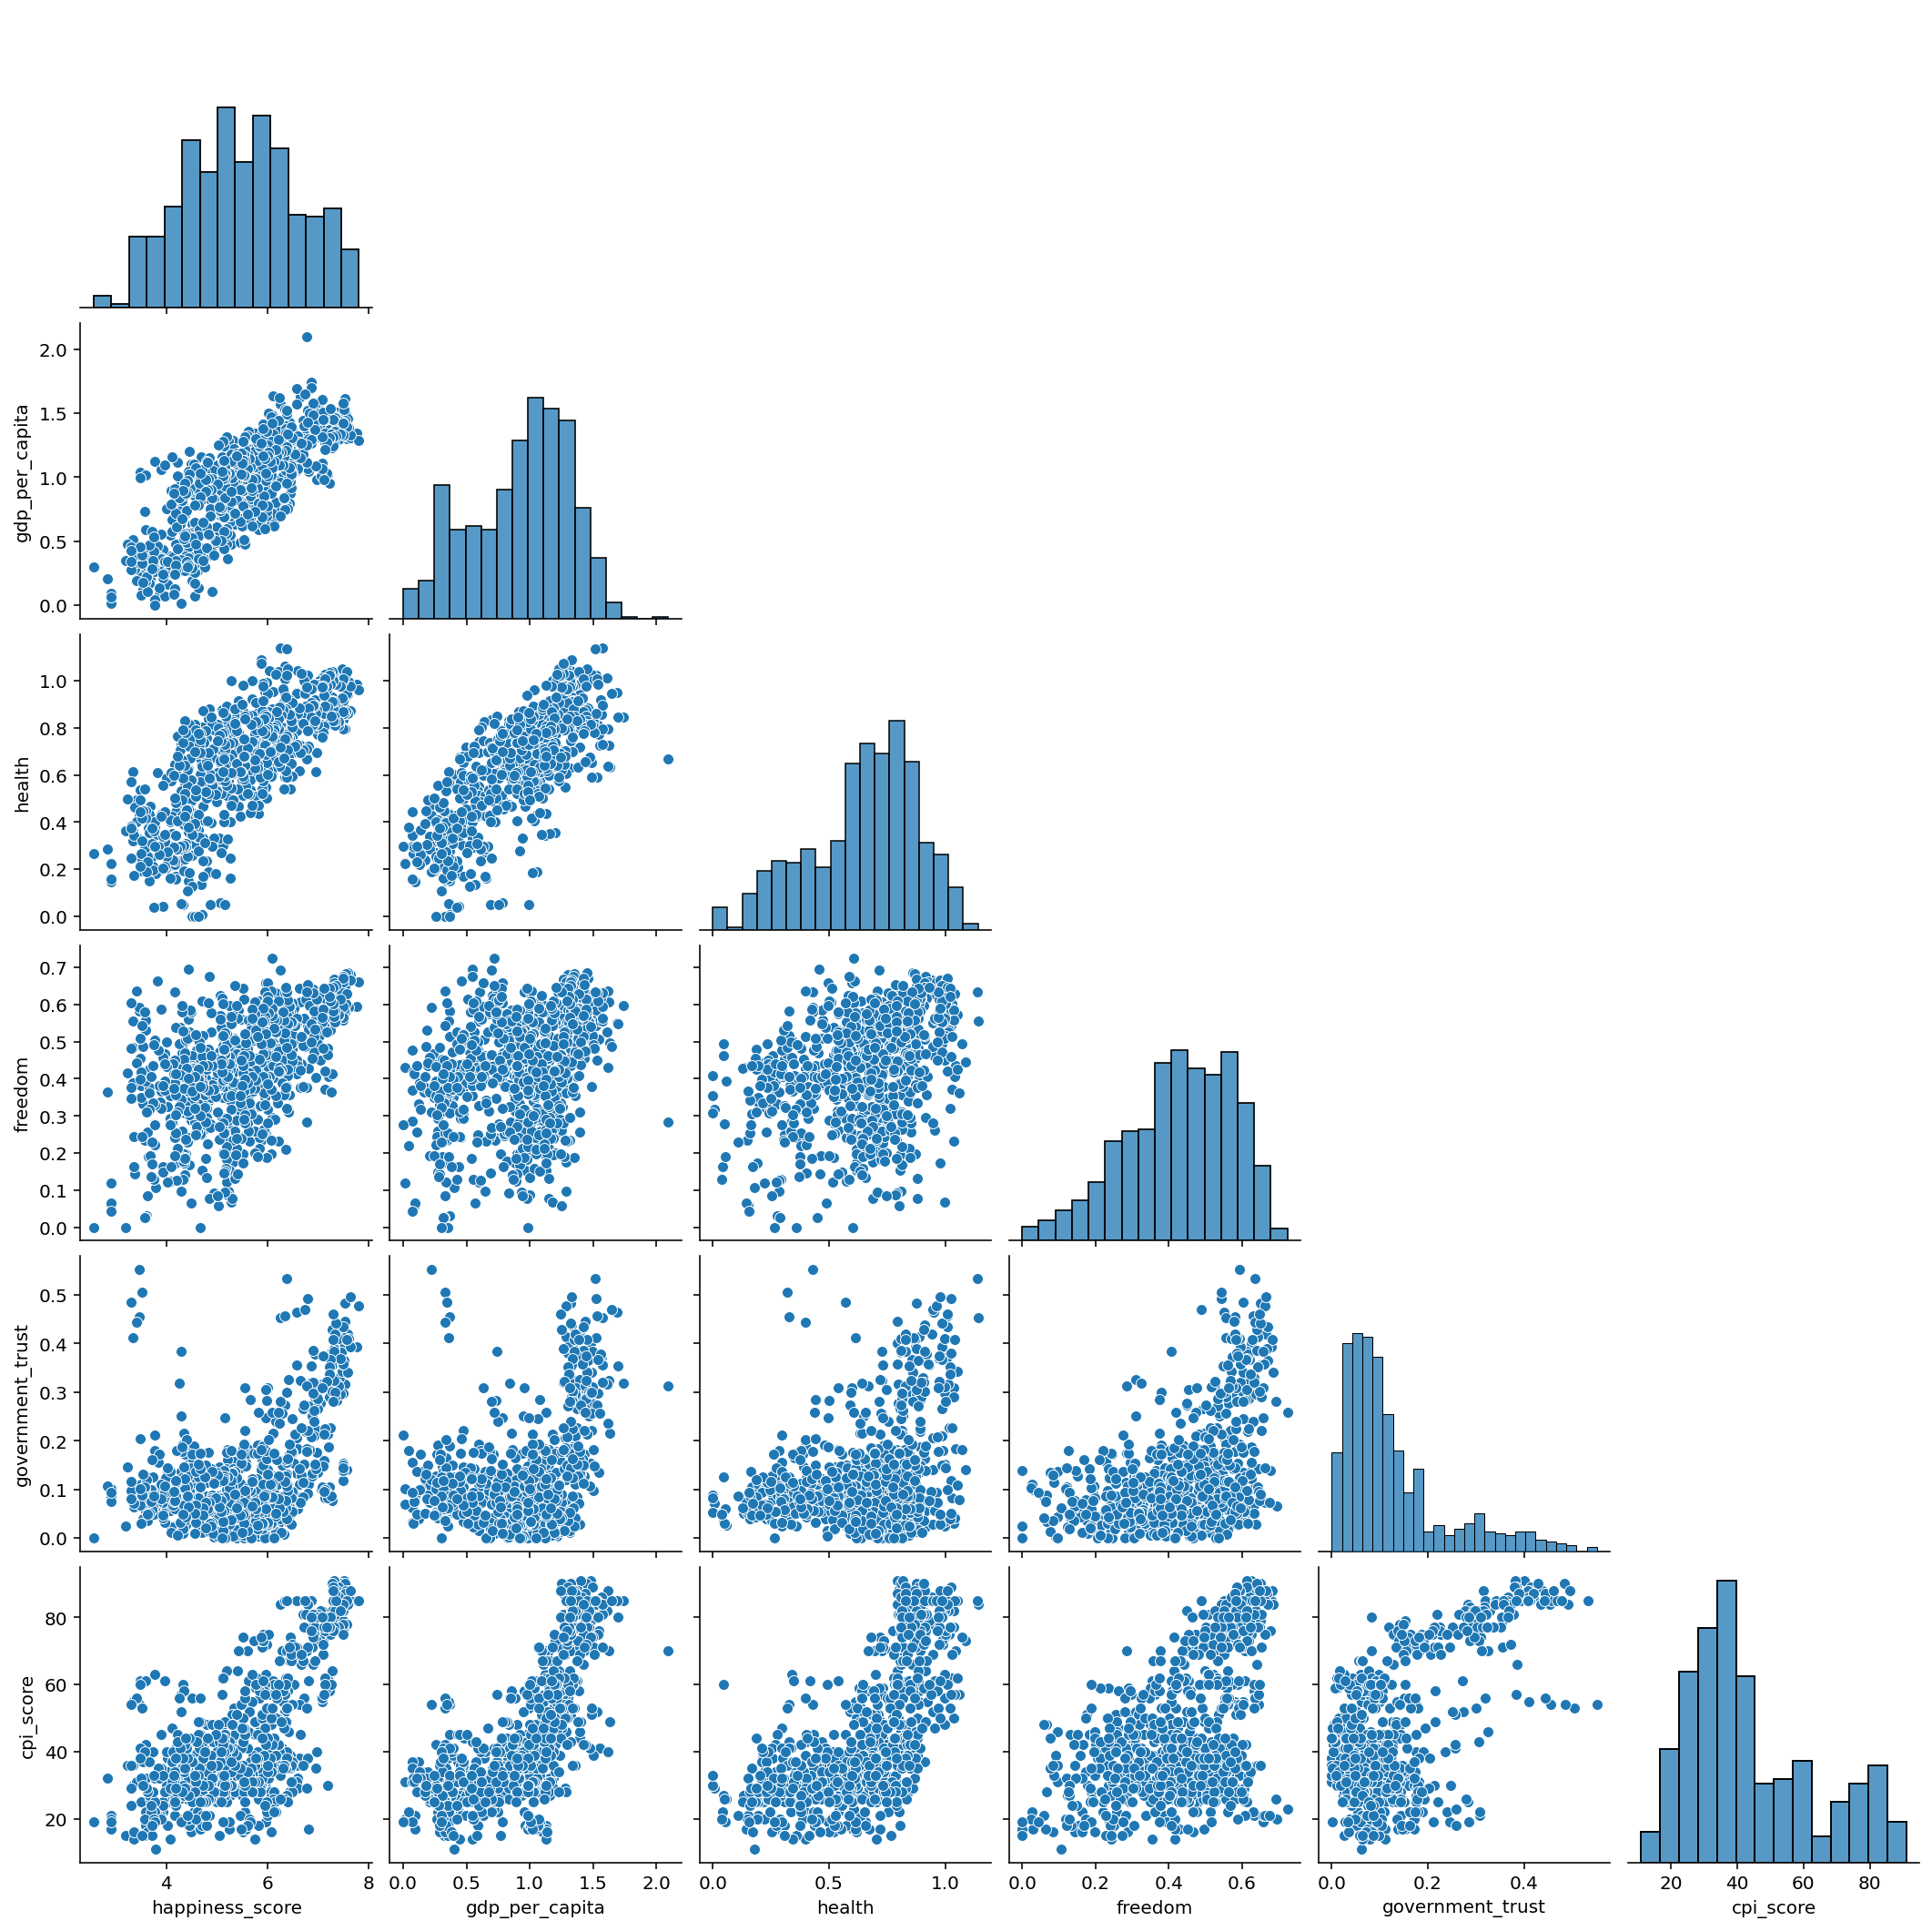

In [9]:
vars_screened = ['happiness_score','gdp_per_capita','health','freedom','government_trust','cpi_score']
sns.pairplot(data=df.reset_index(), vars=vars_screened , corner=True);

add **'region label'**

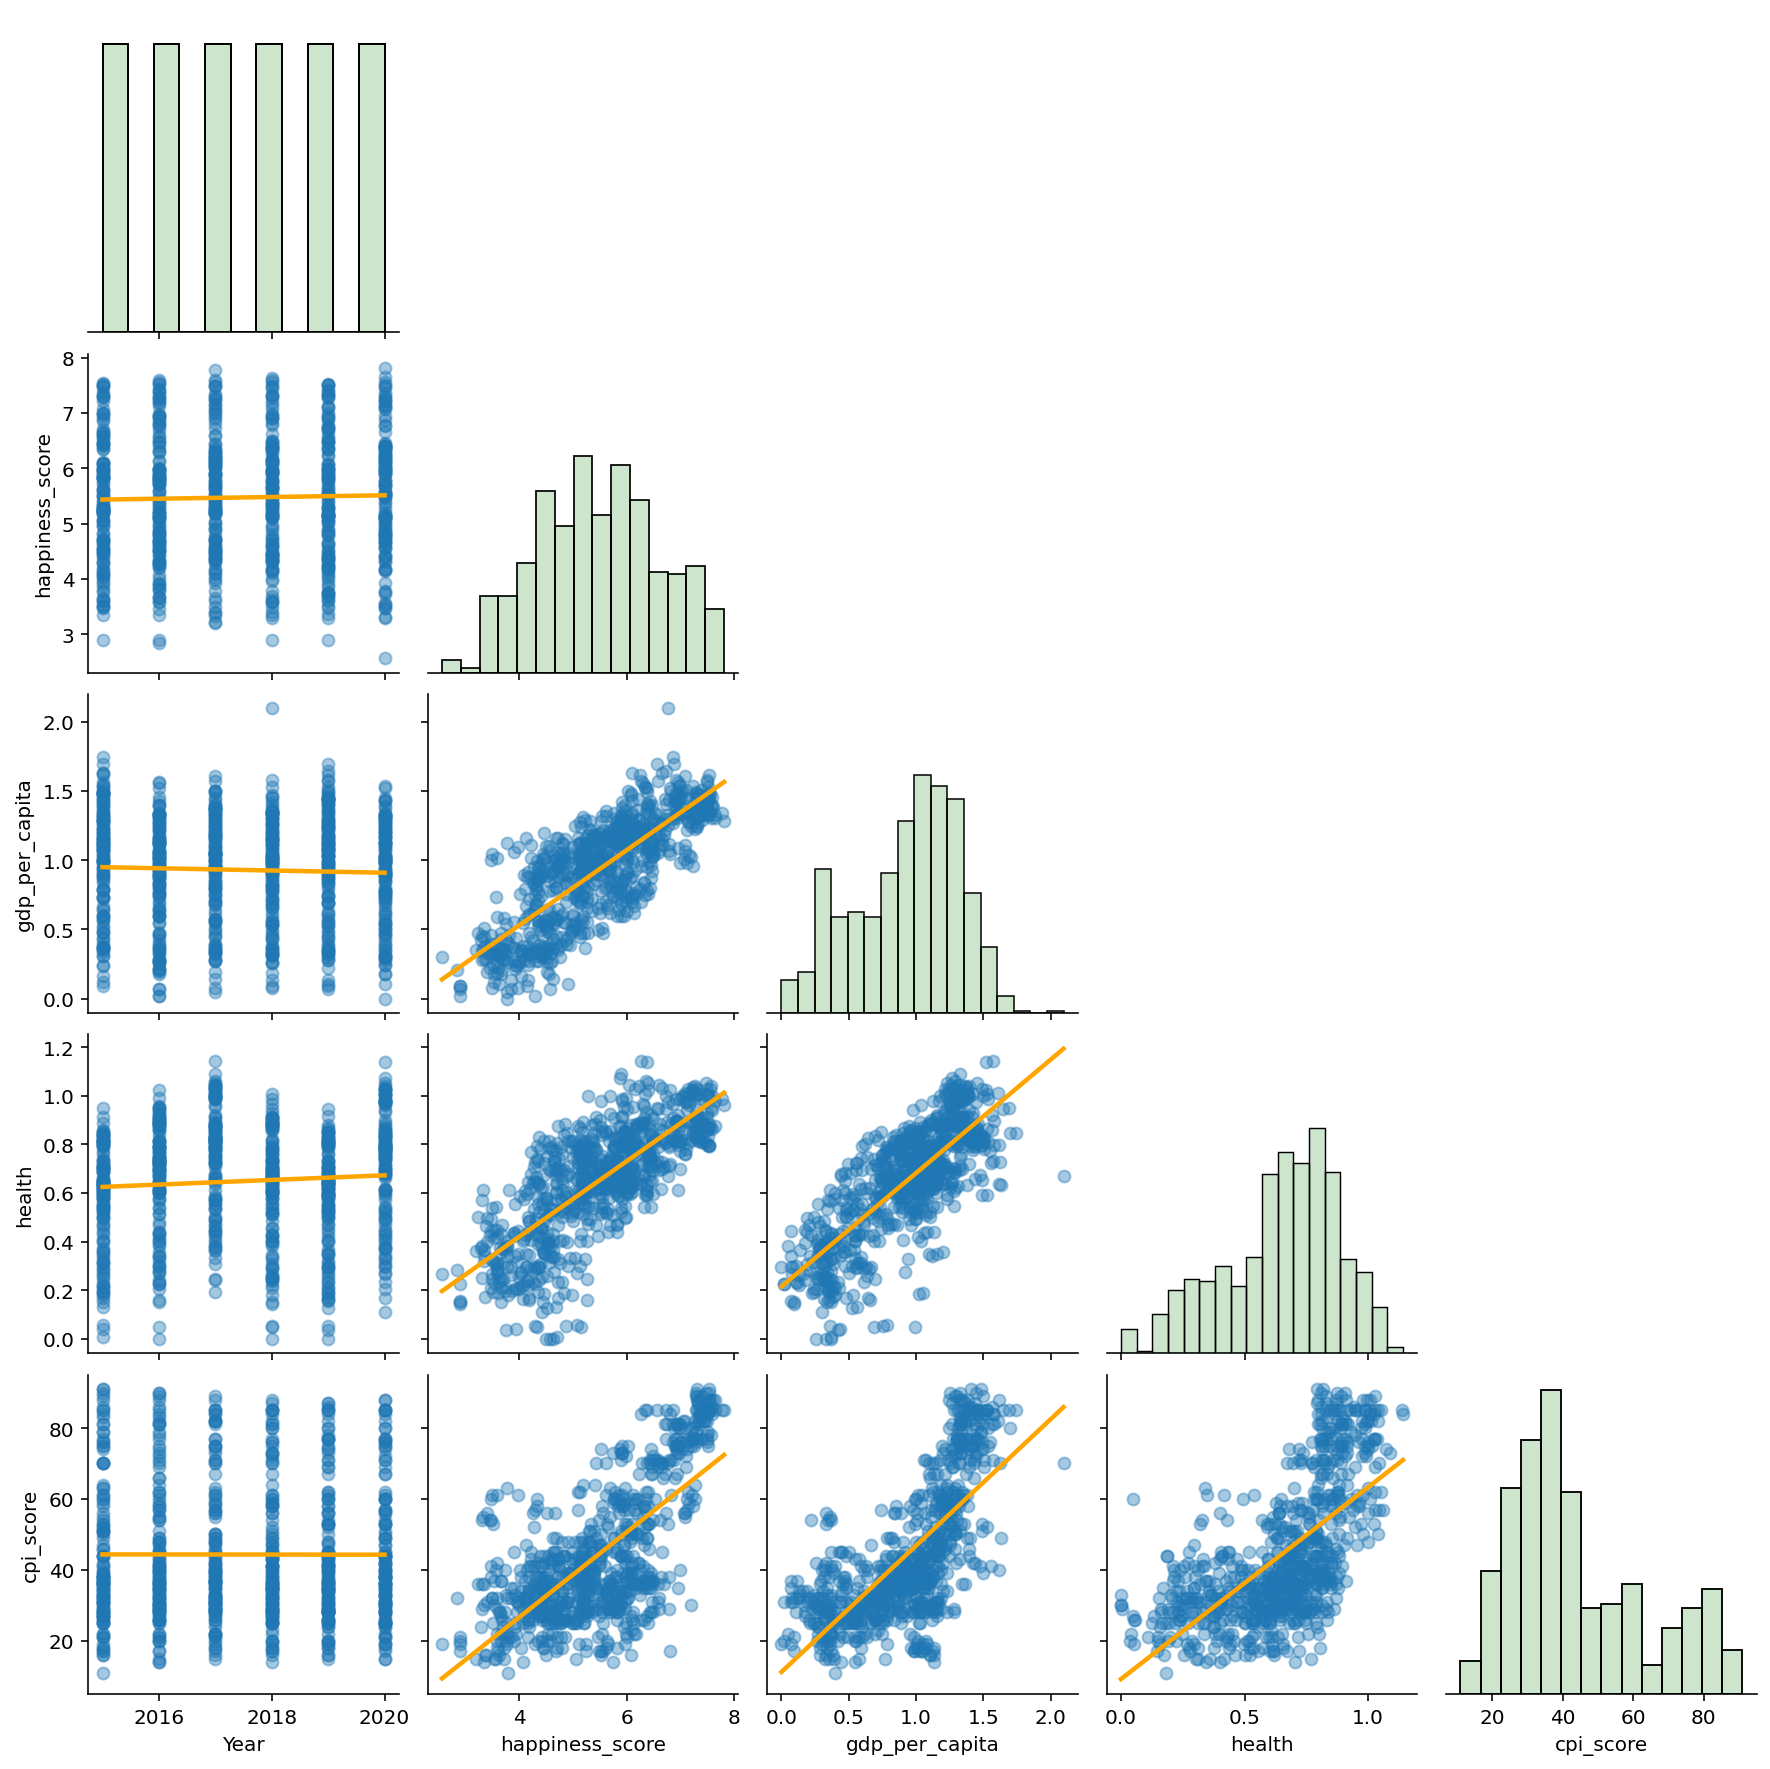

In [10]:
sns.pairplot(df[['happiness_score','gdp_per_capita','health','cpi_score']].reset_index()
             ,kind='reg',corner=True,
             plot_kws={'scatter_kws': {'alpha': .4},
                       'line_kws': {'color': 'orange'}, 'ci':None},
             diag_kws={'color': 'green', 'alpha':.2});

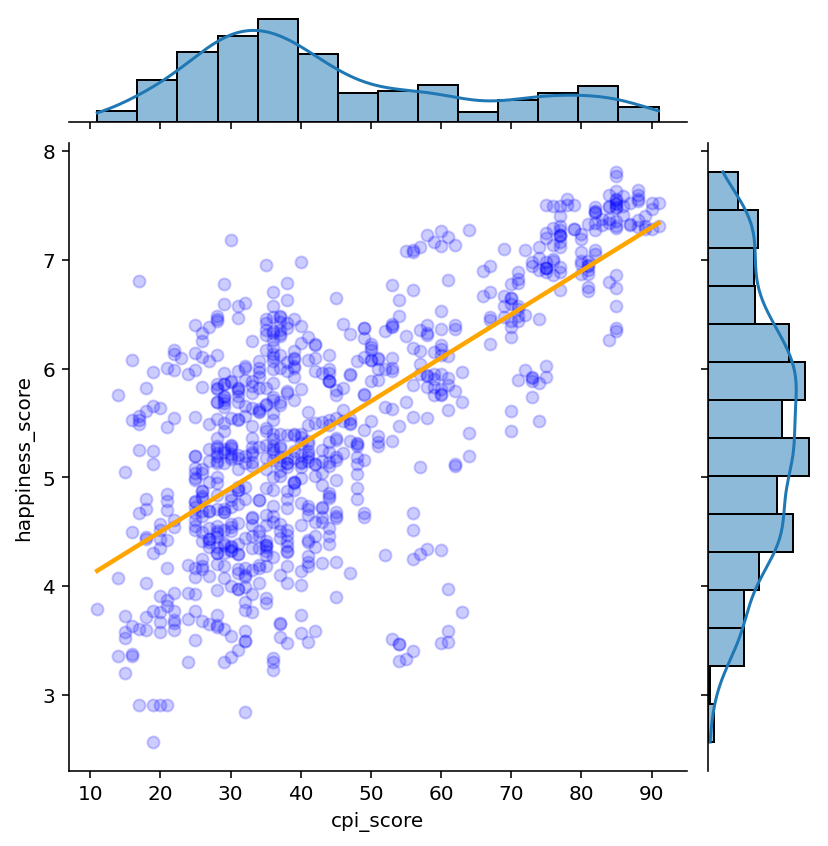

In [11]:
# Check correlate between happiness score and corruption perception index

sns.jointplot(data=df.reset_index(), x='cpi_score', y='happiness_score', kind='reg',ci=None,
              scatter_kws={'alpha': .2,'color':'blue'},
              line_kws={'color':'orange'});

### Scikit-learn
In section,I will use `LinearRegression()` to predict corruption index -> happiness score

**Multiple Regression**
$$
y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{3}+\varepsilon
$$

In [12]:
# import library for predict data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data for predict
X = df[['cpi_score','gdp_per_capita','health']]
y = df.happiness_score
test_size=.2 # follow Pareto Princliple 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=test_size,
                                                   random_state=1) # random_state for reproduct

# Create model
lm = LinearRegression()
lm

LinearRegression()

In [13]:
# Train
lm.fit(X_train,y_train)
print('X,y Train')
print('Intercept:', lm.intercept_,'\n')
print('coefficient:', lm.coef_,'\n')
print('R-squared:', lm.score(X_train,y_train))

X,y Train
Intercept: 2.8632459951497355 

coefficient: [0.01146923 1.15820511 1.57420814] 

R-squared: 0.6845325012164616


In [14]:
lm.fit(X_test,y_test)
print('X,y test')
print('Intercept:', lm.intercept_,'\n')
print('coefficient:', lm.coef_,'\n')
print('R-squared:', lm.score(X_test,y_test))

X,y test
Intercept: 2.9854847180440016 

coefficient: [0.0140446  1.46087105 0.80214335] 

R-squared: 0.7606049524578072


In [15]:
# Predict
print('X_train:', lm.predict(X_train[:1]))
print('X_test:', lm.predict(X_test[:1]))


X_train: [5.48401218]
X_test: [7.08504239]


## StatsModel style

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_lm = smf.ols(formula='happiness_score ~ cpi_score + gdp_per_capita + health', data=df).fit()
print(model_lm.summary(),'\n')
print('P-values:','\n','vvvvvv')
print(model_lm.pvalues,'\n')

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     608.0
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          1.65e-204
Time:                        07:59:30   Log-Likelihood:                -741.83
No. Observations:                 792   AIC:                             1492.
Df Residuals:                     788   BIC:                             1510.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.8810      0.067     43.

**============================thank you==============================**